In [28]:
import os
import sys
import numpy as np
import pandas as pd
from collections import Counter
from tqdm.notebook import tqdm

from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
#--Reading
df = pd.read_csv('../data/campos_extended_matrix_inchikeys.csv', index_col=0)


In [30]:
pca = PCA(n_components=100)
pca_red = pca.fit_transform(df.to_numpy())
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.06818108 0.06014282 0.02590583 0.02274214 0.01720001 0.01528849
 0.01352737 0.01270726 0.01036494 0.01008709 0.00840129 0.0081555
 0.00743341 0.00664726 0.00637124 0.0061829  0.00602657 0.00577572
 0.00566963 0.0056092  0.00549776 0.00526241 0.00515443 0.00493388
 0.0048152  0.00472294 0.00460422 0.00450919 0.00439585 0.00430813
 0.00422098 0.0041271  0.00402728 0.00395898 0.00392418 0.00387672
 0.0037528  0.00373736 0.00366495 0.0036101  0.00359366 0.00356597
 0.00352645 0.00345016 0.00338677 0.00334181 0.00330639 0.00326167
 0.00323473 0.0031882  0.00316639 0.00311885 0.0031013  0.0030572
 0.00300784 0.0029511  0.00292253 0.00290985 0.00286475 0.00285424
 0.00281525 0.00278437 0.00276543 0.0027493  0.00270374 0.00269517
 0.00265814 0.00261769 0.00261498 0.00255489 0.00254844 0.00246972
 0.00245327 0.00242222 0.0024071  0.00238962 0.00234683 0.00233452
 0.00232407 0.00230461 0.00227641 0.00226686 0.00223998 0.00223109
 0.00220657 0.00218992 0.00216117 0.00215734 0.00212231 0.002111

In [8]:
pca_red.shape

(1309, 100)

In [9]:
pca_df = pd.DataFrame(pca_red, index=df.index)

In [10]:
v = pca_df.values.ravel()

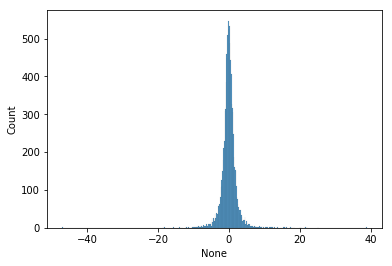

In [11]:
sns.histplot(np.random.choice(v, 10000))

In [12]:
np.percentile(v, 90)

1.9428337517009322

In [13]:
pca_df = pd.DataFrame(pca_red, index=df.index)

#--Trasforming
cutoff = np.percentile(v, 90)
pca_df = pca_df > cutoff
pca_df_neg = pca_df < -cutoff

pca_df = pd.merge(pca_df, pca_df_neg, left_index=True, right_index=True)

uneffective = pca_df.index.values[np.array(pca_df.sum(1) == 0)]
pca_df = pca_df.iloc[np.array(pca_df.sum(1) > 0)]

print('# uneffective: %i'%len(uneffective))
print('# effective: %i'%len(df))

# uneffective: 50
# effective: 1309


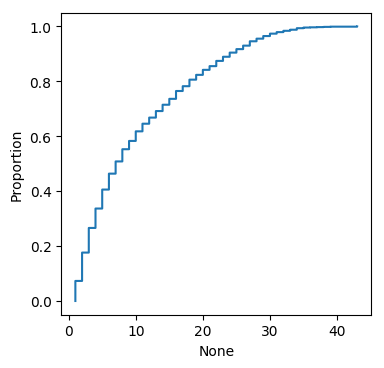

In [14]:
plt.figure(figsize=(4,4),dpi=100)
sns.ecdfplot(pca_df.sum(1))

In [15]:
#--Getting similarities
jc_similarities = 1- pdist(pca_df, 'jaccard')
df2 = pd.DataFrame(squareform(jc_similarities), index= pca_df.index.values, columns=pca_df.index.values)

In [16]:
df2

,AADCDMQTJNYOSS-LBPRGKRZSA-N,AAFNEINEQRQMTF-LREBCSMRSA-N,ABTXGJFUQRCPNH-UHFFFAOYSA-N,ACGDKVXYNVEAGU-UHFFFAOYSA-N,ACGUYXCXAPNIKK-UHFFFAOYSA-N,ACTOXUHEUCPTEW-OBURPCBNSA-N,ACWBQPMHZXGDFX-QFIPXVFZSA-N,AEOCXXJPGCBFJA-UHFFFAOYSA-N,AEUTYOVWOVBAKS-UWVGGRQHSA-N,AFJCNBBHEVLGCZ-UHFFFAOYSA-N,...,ZUFQODAHGAHPFQ-UHFFFAOYSA-N,ZUFVXZVXEJHHBN-UHFFFAOYSA-N,ZUXNZUWOTSUBMN-UHFFFAOYSA-N,ZWBTYMGEBZUQTK-PVLSIAFMSA-N,ZWZIQPOLMDPIQM-UHFFFAOYSA-N,ZXKXJHAOUFHNAS-FVGYRXGTSA-N,ZXNRTKGTQJPIJK-UHFFFAOYSA-N,ZYSCHNVPUOSLNC-BTJKTKAUSA-N,ZZORFUFYDOWNEF-UHFFFAOYSA-N,ZZUFCTLCJUWOSV-UHFFFAOYSA-N
AADCDMQTJNYOSS-LBPRGKRZSA-N,0.000000,0.035714,0.000000,0.086957,0.150000,0.125000,0.166667,0.136364,0.193548,0.151515,...,0.107143,0.00,0.100000,0.107143,0.000000,0.043478,0.000000,0.035714,0.034483,0.200000
AAFNEINEQRQMTF-LREBCSMRSA-N,0.035714,0.000000,0.000000,0.111111,0.068966,0.000000,0.062500,0.000000,0.047619,0.045455,...,0.000000,0.00,0.058824,0.066667,0.230769,0.125000,0.000000,0.076923,0.250000,0.080000
ABTXGJFUQRCPNH-UHFFFAOYSA-N,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.062500,0.058824,...,0.000000,0.00,0.181818,0.100000,0.100000,0.000000,0.000000,0.000000,0.111111,0.000000
ACGDKVXYNVEAGU-UHFFFAOYSA-N,0.086957,0.111111,0.000000,0.000000,0.000000,0.083333,0.034483,0.000000,0.000000,0.000000,...,0.000000,0.00,0.076923,0.090909,0.090909,0.250000,0.250000,0.250000,0.100000,0.095238
ACGUYXCXAPNIKK-UHFFFAOYSA-N,0.150000,0.068966,0.000000,0.000000,0.000000,0.119048,0.133333,0.106383,0.114286,0.290323,...,0.064516,0.04,0.029412,0.064516,0.064516,0.000000,0.040000,0.000000,0.066667,0.128205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXKXJHAOUFHNAS-FVGYRXGTSA-N,0.043478,0.125000,0.000000,0.250000,0.000000,0.041667,0.035714,0.034483,0.062500,0.000000,...,0.000000,0.00,0.083333,0.222222,0.000000,0.000000,0.000000,0.125000,0.111111,0.047619
ZXNRTKGTQJPIJK-UHFFFAOYSA-N,0.000000,0.000000,0.000000,0.250000,0.040000,0.041667,0.035714,0.000000,0.000000,0.000000,...,0.100000,0.00,0.083333,0.000000,0.100000,0.000000,0.000000,0.125000,0.000000,0.047619
ZYSCHNVPUOSLNC-BTJKTKAUSA-N,0.035714,0.076923,0.000000,0.250000,0.000000,0.071429,0.096774,0.060606,0.047619,0.000000,...,0.066667,0.00,0.125000,0.066667,0.142857,0.125000,0.125000,0.000000,0.153846,0.125000
ZZORFUFYDOWNEF-UHFFFAOYSA-N,0.034483,0.250000,0.111111,0.100000,0.066667,0.033333,0.060606,0.028571,0.095238,0.090909,...,0.000000,0.00,0.117647,0.062500,0.133333,0.111111,0.000000,0.153846,0.000000,0.037037


/home/nkurzawa/miniconda3/envs/sign/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


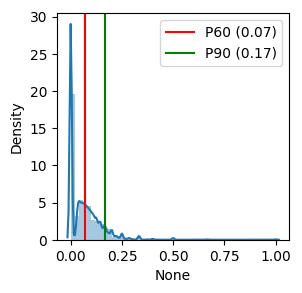

In [31]:
plt.figure(figsize=(3,3),dpi=100)
sns.distplot(jc_similarities)

colors = ['red','green']
for pc, col in zip([60, 90],colors):
    plt.axvline(np.percentile(jc_similarities, pc), label='P%i (%.2f)'%(pc,np.percentile(jc_similarities, pc)),
               color=col)
plt.legend()

In [18]:
#--Defining parameters for triplets
proportion = 0.05
n_neigh = int(df2.shape[0]*proportion)
min_jc =  np.percentile(jc_similarities, 60)
high_jc = np.percentile(jc_similarities, 95)

N_triplets = 1000000
N_hard = 0.3
N_soft = 1-N_hard
#proporiton_uneffective = 0.25

n_trip = int(np.round(1000000*N_soft/df2.shape[0]))
n_hard_trip = int(np.round(1000000*N_hard/df2.shape[0]))
#n_trip_uneffective = int(np.round(n_trip*proporiton_uneffective))
#n_trip = int(n_trip - n_trip_uneffective)

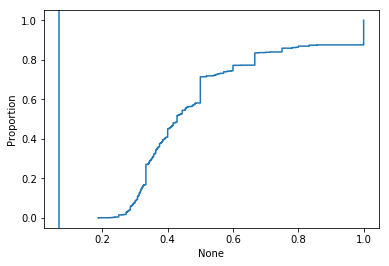

In [19]:
sns.ecdfplot(df2.max())
plt.axvline(np.percentile(jc_similarities, 60))

In [20]:
dgs = np.array(df2.columns)
triplets = []
hard_triplets = {0:[],1:[],2:[]}
for ix,dg in tqdm(enumerate(df2.index.values), total=df2.shape[0]):
    _triplets = []
    _hard_triplets = {0:[],1:[],2:[]}
    
    #--Getting jaccard similarity  vector
    v = np.array(df2.iloc[ix])
    v[ix] = np.nan #masking itself
  
    #--Getting pos
    ixs = np.where(v >= high_jc)[0]
    if len(ixs) < n_neigh:
        ixs = np.argsort(v)[::-1]
        ixs = ixs[v[ixs] >= min_jc]
        if len(ixs) == 0: continue
        cutoff = v[ixs][min([n_neigh-1, len(ixs)-1])]
        ixs = v >= cutoff
        
    neighs = dgs[ixs]
    similarities = v[ixs]
    probs = similarities / np.sum(similarities)
    
    #--Getting negs
    #negs = np.array(list(set(dgs)-set(neighs))) 
    negs = np.array(list(set(dgs)-set(neighs.tolist()+[dg])))
    
    #--Getting triplets
    
    #----Negs
    for _ in range(n_trip):
        _triplets.append([dg,np.random.choice(neighs,p=probs), np.random.choice(negs)])
    
    
    #for _ in range(n_trip_uneffective):
    #    _triplets.append([dg,np.random.choice(neighs,p=probs), np.random.choice(uneffective)])
  
    #  for i, neg in enumerate(negs):
  #      if i-norm == len(neighs):
  #          norm+=len(neighs)
  #      pos = neighs[i-norm]
 # 
 #       _triplets.append([dg,pos,neg])
  
    triplets.extend(_triplets)
    
    #--Adding hard triplets
    scores = np.unique(similarities)
    cutoffs = np.unique([np.percentile(scores,pc) for pc in [0,25,50,75,100]]) #unique and sort
    labels = np.arange(len(cutoffs))[:-1]
    groups = np.array(pd.cut(similarities, cutoffs, labels=labels))
    labels = [x for x in labels if x in groups]

    if len(labels) > 1:
        n_subhard = int(np.ceil(n_hard_trip/(len(labels)-1)))

        hard_positives = neighs[groups == labels[-1]]
        hard_probs = similarities[groups == labels[-1]]
        hard_probs = hard_probs/np.sum(hard_probs)

        for i in range(len(labels)-1):
            hard_negatives =  neighs[groups == labels[i]]
            assert len(set(hard_negatives) & set(hard_positives)) == 0
            for _ in range(n_subhard):
                _hard_triplets[labels[i]].append([dg,np.random.choice(hard_positives, p=hard_probs), np.random.choice(hard_negatives)])
        
    hard_triplets[0].extend(_hard_triplets[0])
    hard_triplets[1].extend(_hard_triplets[1])
    hard_triplets[2].extend(_hard_triplets[2])
    
    
    #labels = [labels[0],labels[-1]] # Skiping Q2 and Q3, so the hard negative are Q1 and hard positives are Q4
    #for i in range(len(labels)-1):
    #    g1 = labels[i]
    #    g2 = labels[i+1]
    #    dg1 = dgs[ixs][groups==g1]
    #    dg2 = dgs[ixs][groups==g2]
    #    for hard_neg in dg1:
    #        for hard_pos in dg2:
    #            _hard_triplets.append([dg, hard_pos, hard_neg])
                

    #n_hard = int(len(_triplets)*proportion_hard_triplets)
    #hard_triplets.extend(np.random.permutation(_hard_triplets)[:n_hard])
    #hard_triplets.extend(np.rando,


  0%|          | 0/1259 [00:00<?, ?it/s]

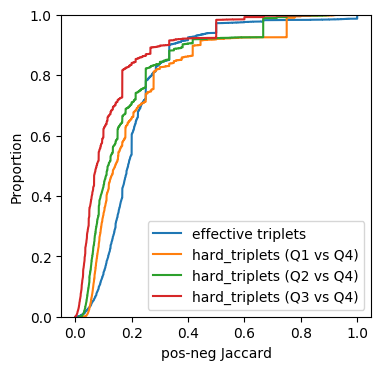

In [21]:
k = df2.melt(ignore_index=False).reset_index().values
pair2score = dict(zip(zip(k[:,0],k[:,1]), k[:,2]))

plt.figure(figsize=(4,4),dpi=100)

#--triplets
v = []
#v2 = []
for x in triplets:
    pos =  x[0],x[1]
    neg = x[0],x[2]
    if pos in pair2score:
        pos  = pair2score[pos]
    else:
        sys.exit()
        
    if neg in pair2score:
        neg = pair2score[neg]
        v.append(pos-neg)
    else:
        sys.exit()
        #neg = 0  
        #v2.append(pos-neg)
        
sns.ecdfplot(v, label='effective triplets')
#sns.ecdfplot(v2, label='uneffective triplets')

#--hard triplets
for g in hard_triplets:
    
    v2 = []
    for x in hard_triplets[g]:
        pos =  x[0],x[1]
        neg = x[0],x[2]
        if pos in pair2score:
            pos  = pair2score[pos]
        else:
            sys.exit()

        if neg in pair2score:
            neg = pair2score[neg]
        else:
            sys.exit()

        v2.append(pos-neg)
    
    sns.ecdfplot(v2, label='hard_triplets (Q%i vs Q4)'%(g+1))


plt.xlabel('pos-neg Jaccard')
plt.legend()
#plt.xlim(0,np.percentile(jc_similarities,99))

In [22]:
all_triplets = list(triplets)
for g in list(hard_triplets):
    all_triplets.extend(list(hard_triplets[g]))
all_triplets = np.array(all_triplets)

print('triplets: %i'%len(triplets))
_uneffective = set(uneffective)
easy = len([x for x in triplets if x[-1] in _uneffective])
print('\t--> effective: %i (%.2f)%%'%(len(triplets)-easy, (100*(len(triplets)-easy)/len(all_triplets))))
print('\t--> uneffective: %i (%.2f)%%'%(easy, 100*easy/len(all_triplets)))
total_hard = np.sum([len(hard_triplets[g]) for g in hard_triplets])
print('hard triplets: %i'%total_hard)
for g in hard_triplets:
    print('\t--> Q%i vs Q4: %i (%.2f)%%'%(g+1, len(hard_triplets[g]),100*len(hard_triplets[g])/len(all_triplets)))
print('all triplets: %i'%len(all_triplets))


triplets: 700004
	--> effective: 700004 (69.85)%
	--> uneffective: 0 (0.00)%
hard triplets: 302154
	--> Q1 vs Q4: 100480 (10.03)%
	--> Q2 vs Q4: 100837 (10.06)%
	--> Q3 vs Q4: 100837 (10.06)%
all triplets: 1002158


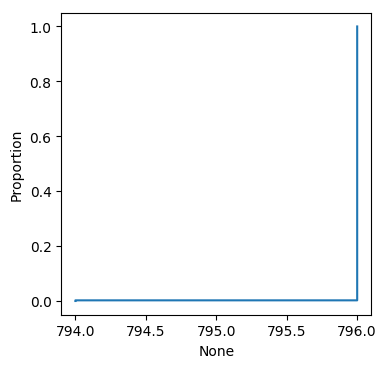

In [23]:
v = list(Counter(all_triplets[:,0]).values())

plt.figure(figsize=(4,4),dpi=100)
sns.ecdfplot(v)

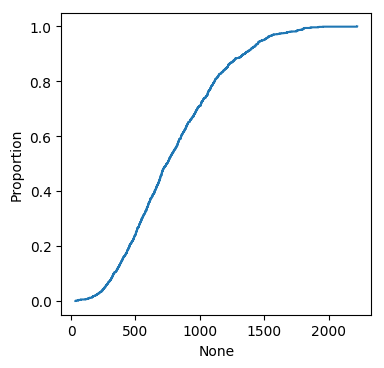

In [24]:
v = list(Counter(all_triplets[:,1]).values())

plt.figure(figsize=(4,4),dpi=100)
sns.ecdfplot(v)

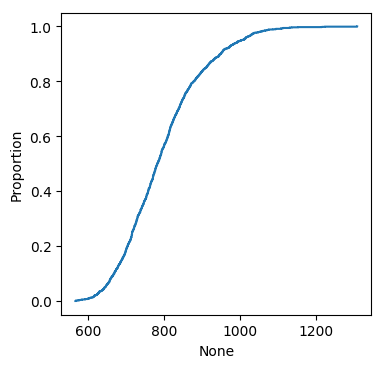

In [25]:
v = list(Counter(all_triplets[:,2]).values())

plt.figure(figsize=(4,4),dpi=100)
sns.ecdfplot(v)

In [26]:
#Writing
all_triplets = pd.DataFrame(all_triplets, columns=['anchor','pos','neg']).sort_values(['anchor','pos','neg']).reset_index(drop=True)
all_triplets.to_csv('./m2_full_pca_triplets.tsv.gz', sep='\t', index=False, compression='gzip')

In [27]:
all_triplets

,anchor,pos,neg
0,AADCDMQTJNYOSS-LBPRGKRZSA-N,AEUTYOVWOVBAKS-UWVGGRQHSA-N,GECHUMIMRBOMGK-UHFFFAOYSA-N
1,AADCDMQTJNYOSS-LBPRGKRZSA-N,AEUTYOVWOVBAKS-UWVGGRQHSA-N,NZMOFYDMGFQZLS-UHFFFAOYSA-N
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,AEUTYOVWOVBAKS-UWVGGRQHSA-N,PJLVTVAIERNDEQ-BTJKTKAUSA-N
3,AADCDMQTJNYOSS-LBPRGKRZSA-N,AEUTYOVWOVBAKS-UWVGGRQHSA-N,VKJHTUVLJYWAEY-UHFFFAOYSA-N
4,AADCDMQTJNYOSS-LBPRGKRZSA-N,AEUTYOVWOVBAKS-UWVGGRQHSA-N,WAOQONBSWFLFPE-SECBINFHSA-N
...,...,...,...
1002153,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,ZRVUJXDFFKFLMG-UHFFFAOYSA-N,RZVAJINKPMORJF-UHFFFAOYSA-N
1002154,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,ZRVUJXDFFKFLMG-UHFFFAOYSA-N,SPFVHFBNXPARTR-IDMXKUIJSA-N
1002155,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,ZRVUJXDFFKFLMG-UHFFFAOYSA-N,XGBFWQUQYQIFLB-MTTMTQIXSA-N
1002156,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,ZRVUJXDFFKFLMG-UHFFFAOYSA-N,YVPYQUNUQOZFHG-UHFFFAOYSA-N
